### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '../tune_octupole/'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### nominal optics

In [2]:
# Define study
STUDY_NAME = "opt_round_150_1500_tune_scan"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0045/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

normalized amplitude in xy-plane  \
beam  qx     qy     i_oct_b1 i_oct_b2                                     
lhcb1 62.305 60.309 60.0     60.0                                 4.500   
             60.310 60.0     60.0                                 4.500   
             60.311 60.0     60.0                                 4.531   
             60.312 60.0     60.0                                 4.500   
             60.313 60.0     60.0                                 4.531   
...                                                                 ...   
      62.323 60.328 60.0     60.0                                 4.500   
             60.329 60.0     60.0                                 4.500   
      62.324 60.328 60.0     60.0                                 4.500   
             60.329 60.0     60.0                                 4.500   
      62.325 60.329 60.0     60.0                                 4.500   

                                           qx      qy   dqx   dqy  i_bunch_b1  \
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.309 60.0     60.0      62.305  60.309  15.0  15.0      1130.0   
             60.310 60.0     60.0      62.305  60.310  15.0  15.0      1130.0   
             60.311 60.0     60.0      62.305  60.311  15.0  15.0      1130.0   
             60.312 60.0     60.0      62.305  60.312  15.0  15.0      1130.0   
             60.313 60.0     60.0      62.305  60.313  15.0  15.0      1130.0   
...                                       ...     ...   ...   ...         ...   
      62.323 60.328 60.0     60.0      62.323  60.328  15.0  15.0      1130.0   
             60.329 60.0     60.0      62.323  60.329  15.0  15.0      1130.0   
      62.324 60.328 60.0     60.0      62.324  60.328  15.0  15.0      1130.0   
             60.329 60.0     60.0      62.324  60.329  15.0  15.0      1130.0   
      62.325 60.329 60.0     60.0      62.325  60.329  15.0  15.0      1130.0   

                                       i_bunch_b2  num_particles_per_bunch  \
beam  qx     qy     i_oct_b1 i_oct_b2                                        
lhcb1 62.305 60.309 60.0     60.0          1127.0             1.400000e+11   
             60.310 60.0     60.0          1127.0             1.400000e+11   
             60.311 60.0     60.0          1127.0             1.400000e+11   
             60.312 60.0     60.0          1127.0             1.400000e+11   
             60.313 60.0     60.0          1127.0             1.400000e+11   
...                                           ...                      ...   
      62.323 60.328 60.0     60.0          1127.0             1.400000e+11   
             60.329 60.0     60.0          1127.0             1.400000e+11   
      62.324 60.328 60.0     60.0          1127.0             1.400000e+11   
             60.329 60.0     60.0          1127.0             1.400000e+11   
      62.325 60.329 60.0     60.0          1127.0             1.400000e+11   

                                       crossing_angle  
beam  qx     qy     i_oct_b1 i_oct_b2                  
lhcb1 62.305 60.309 60.0     60.0               250.0  
             60.310 60.0     60.0               250.0  
             60.311 60.0     60.0               250.0  
             60.312 60.0     60.0               250.0  
             60.313 60.0     60.0               250.0  
...                                               ...  
      62.323 60.328 60.0     60.0               250.0  
             60.329 60.0     60.0               250.0  
      62.324 60.328 60.0     60.0               250.0  
             60.329 60.0     60.0               250.0  
      62.325 60.329 60.0     60.0               250.0  

[231 rows x 9 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")


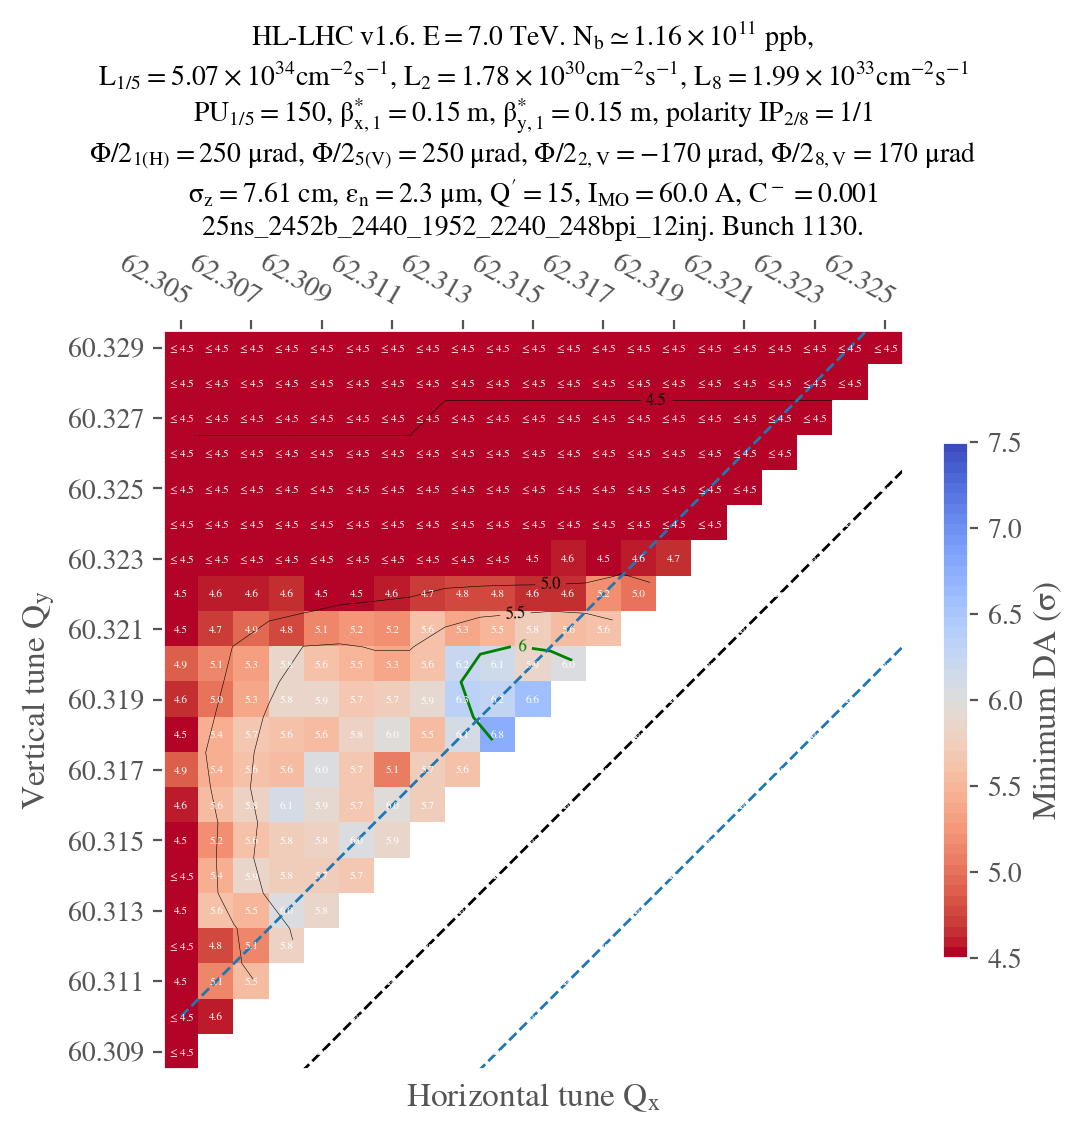

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.15,
    bety = 0.15,
    symmetric=True,
    mask_lower_triangle=True,
    plot_diagonal_lines=True,
    xaxis_ticks_on_top=True,
    display_intensity=True,
    #title="opt_collapse_1100_1500_oct_scan",
)

### Phase opt optics

In [6]:
# Define study
STUDY_NAME = "opt_round_150_1500_optphases_tune_scan"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0045/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

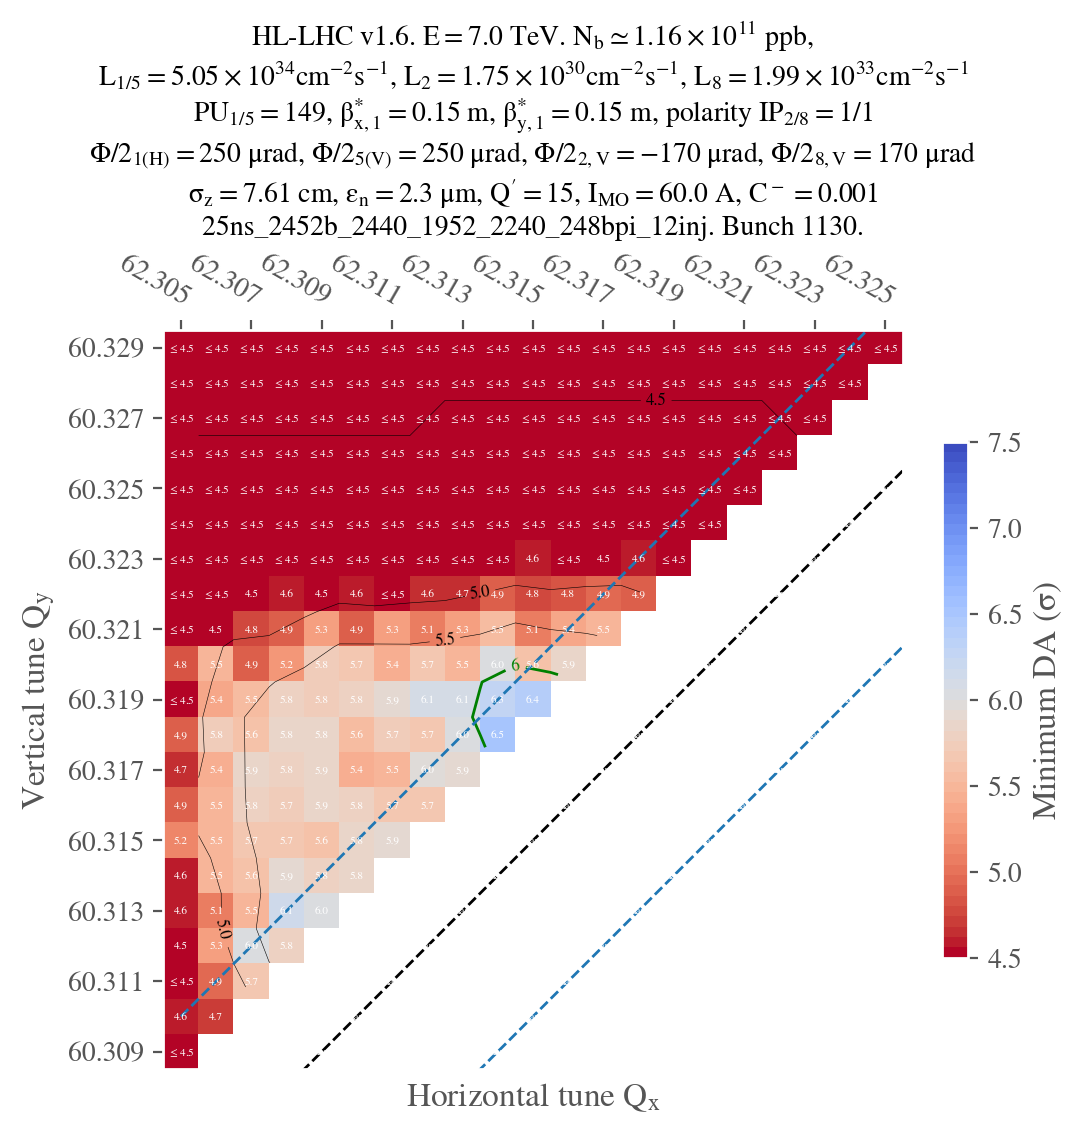

In [7]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.15,
    bety = 0.15,
    symmetric=True,
    mask_lower_triangle=True,
    plot_diagonal_lines=True,
    xaxis_ticks_on_top=True,
    display_intensity=True,
    #title="opt_collapse_1100_1500_oct_scan",
)


### optphases 8b4e bunch

In [8]:
# Define study
STUDY_NAME = "opt_round_150_1500_optphases_tune_scan_8b4e_bunch"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0045/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

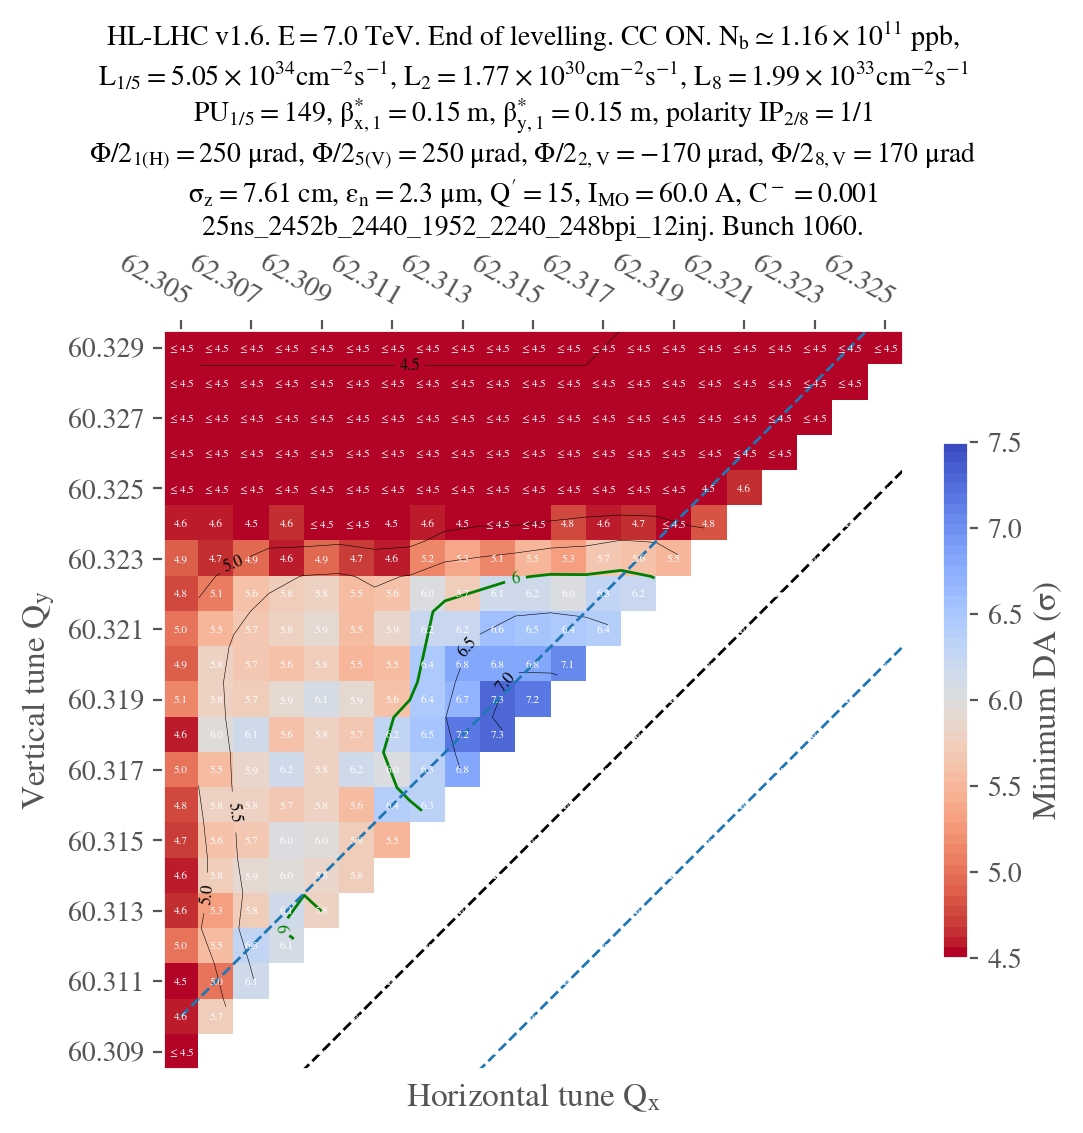

In [9]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.15,
    bety = 0.15,
    symmetric=True,
    mask_lower_triangle=True,
    plot_diagonal_lines=True,
    xaxis_ticks_on_top=True,
    display_intensity=True,
    levelling = 'End of levelling',
    CC = True,
    #title="opt_collapse_1100_1500_oct_scan",
)